# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Titanic-Dataset.csv")

# Data Preprocessing

In [3]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
ds = ds[ds["Age"].notnull()]

In [6]:
ds.notnull().sum()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

In [7]:
ds = ds.iloc[:,[1,2,4,5]]


In [8]:
ds

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [9]:
X = ds.iloc[:,1:].values
Y = ds.iloc[:,0].values

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
X[:,1]=encoder.fit_transform(X[:,1])

In [12]:
X

array([[3, 1, 22.0],
       [1, 0, 38.0],
       [3, 0, 26.0],
       ...,
       [1, 0, 19.0],
       [1, 1, 26.0],
       [3, 1, 32.0]], shape=(714, 3), dtype=object)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[0])],remainder="passthrough")

In [15]:
X = ct.fit_transform(X)

In [16]:
X

array([[0.0, 0.0, 1.0, 1, 22.0],
       [1.0, 0.0, 0.0, 0, 38.0],
       [0.0, 0.0, 1.0, 0, 26.0],
       ...,
       [1.0, 0.0, 0.0, 0, 19.0],
       [1.0, 0.0, 0.0, 1, 26.0],
       [0.0, 0.0, 1.0, 1, 32.0]], shape=(714, 5), dtype=object)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state = 0)

# Support Vector Classification

In [19]:
from sklearn.svm import SVC

In [20]:
classifier_SVC = SVC(kernel = "linear",random_state = 0)

In [21]:
classifier_SVC.fit(Xtrain,Ytrain)

SVC(kernel='linear', random_state=0)

In [22]:
Ypred_SVC = classifier_SVC.predict(Xtest)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

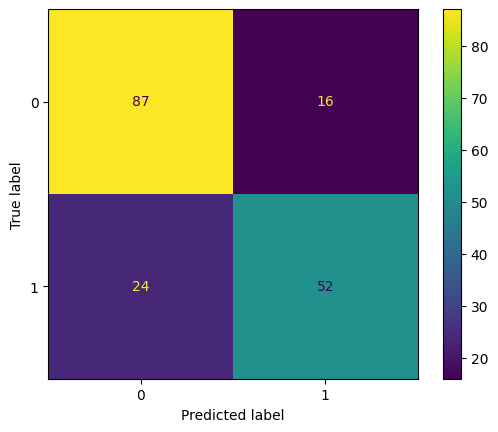

In [24]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred_SVC)

In [25]:
print(f"accuracy score: {accuracy_score(Ytest,Ypred_SVC)}")
print(classification_report(Ytest,Ypred_SVC))

accuracy score: 0.776536312849162
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       103
           1       0.76      0.68      0.72        76

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



# Decision Tree Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
classifier_DTC = DecisionTreeClassifier(random_state = 0)

In [28]:
classifier_DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(random_state=0)

In [29]:
Ypred_DTC = classifier_DTC.predict(Xtest)

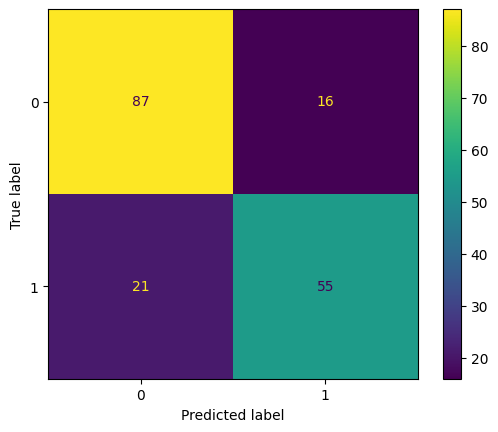

In [30]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred_DTC)

In [31]:
print(f"accuracy score: {accuracy_score(Ytest,Ypred_DTC)}")
print(classification_report(Ytest,Ypred_DTC))

accuracy score: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       103
           1       0.77      0.72      0.75        76

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



# Random Forest Classification

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
classifier_RFC = RandomForestClassifier(n_estimators = 100,random_state =0)

In [34]:
classifier_RFC.fit(Xtrain,Ytrain)

RandomForestClassifier(random_state=0)

In [35]:
Ypred_RFC = classifier_RFC.predict(Xtest)

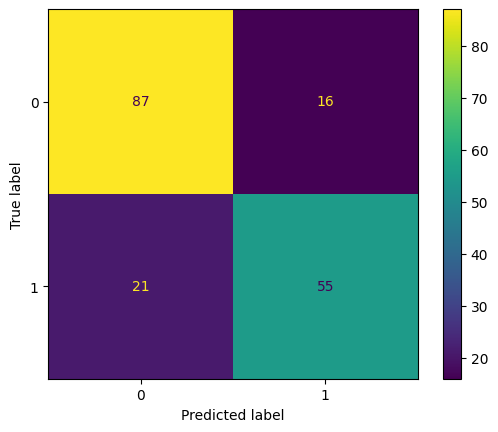

In [36]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred_DTC)

In [37]:
print(f"accuracy score: {accuracy_score(Ytest,Ypred_DTC)}")
print(classification_report(Ytest,Ypred_DTC))

accuracy score: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       103
           1       0.77      0.72      0.75        76

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression 

In [39]:
classifier_LR = LogisticRegression(random_state=0)

In [40]:
classifier_LR.fit(Xtrain,Ytrain)

LogisticRegression(random_state=0)

In [41]:
Ypred_LR=classifier_LR.predict(Xtest)

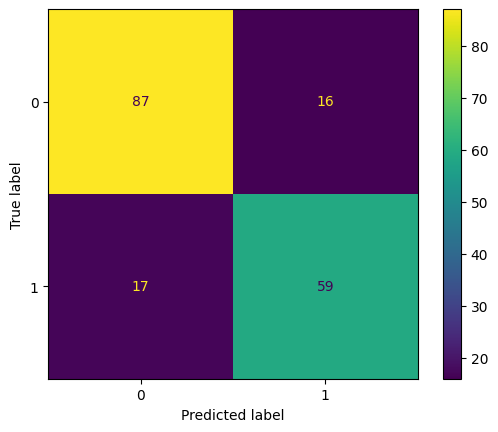

In [42]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred_LR)

In [43]:
print(f"accuracy score: {accuracy_score(Ytest,Ypred_LR)}")
print(classification_report(Ytest,Ypred_LR))

accuracy score: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       103
           1       0.79      0.78      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 1)

In [46]:
classifier_KNN.fit(Xtrain,Ytrain)
Ypred_KNN = classifier_KNN.predict(Xtest)

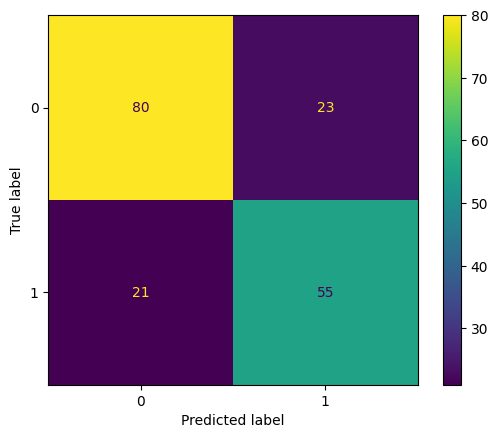

In [47]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred_KNN)

In [48]:
print(f"accuracy score: {accuracy_score(Ytest,Ypred_KNN)}")
print(classification_report(Ytest,Ypred_KNN))

accuracy score: 0.7541899441340782
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       103
           1       0.71      0.72      0.71        76

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
classifier_GNB = GaussianNB()

In [51]:
classifier_GNB.fit(Xtrain,Ytrain)

GaussianNB()

In [52]:
Ypred_GNB = classifier_GNB.predict(Xtest)

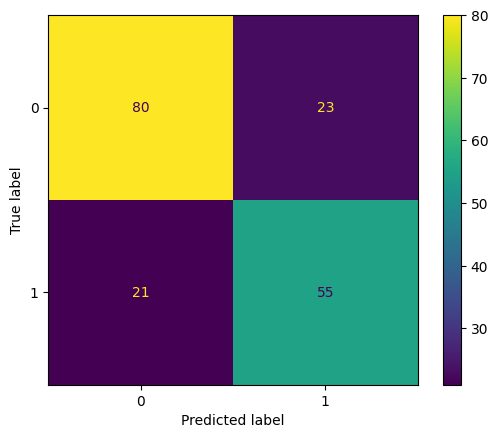

In [53]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred_KNN)

In [54]:
print(f"accuracy score: {accuracy_score(Ytest,Ypred_KNN)}")
print(classification_report(Ytest,Ypred_KNN))

accuracy score: 0.7541899441340782
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       103
           1       0.71      0.72      0.71        76

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179

